In [0]:
# Import the machine learning libraries.
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn import metrics
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Load the credit default dataset.
# The dataset can be downloaded here: https://www.kaggle.com/sazid28/advertising.csv.
advertising = pd.read_csv('./drive/My Drive/ML_Code/Advertising and Sales/advertising.csv')

In [224]:
# Display the first 10 rows.
advertising.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [225]:
# Display the data type of the values.
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [226]:
# Display the statistical information.
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Figure size 720x720 with 0 Axes>

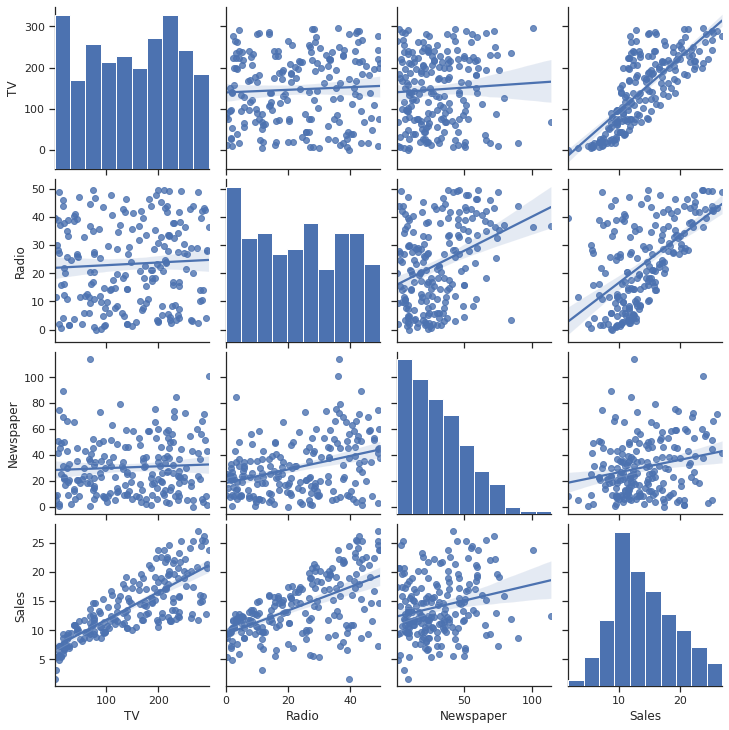

CPU times: user 5.75 s, sys: 1.23 s, total: 6.99 s
Wall time: 5.54 s


In [227]:
# Make a paiwise scatter plot.
%%time
plt.figure(figsize=(10, 10))
sns.set(style="ticks", color_codes=True)
sns.pairplot(advertising, kind="reg")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


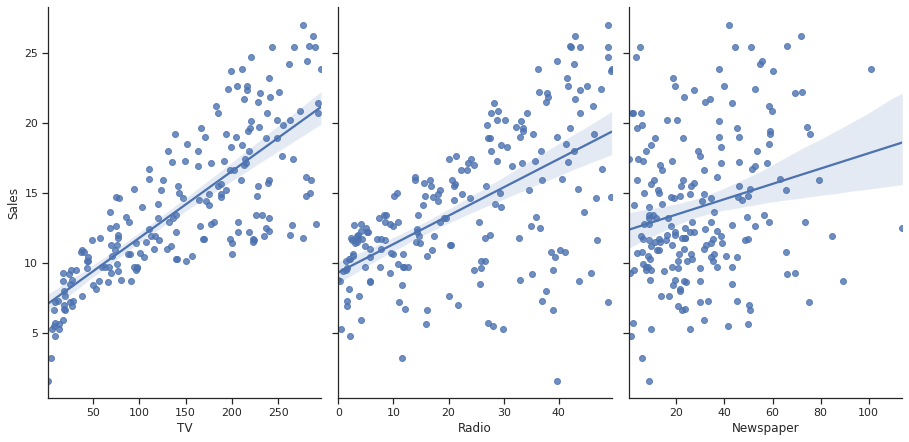

In [228]:
# Scatterplots sales versus TV, Radio, and Newspaper, respectively.
sns.pairplot(advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',size=6, aspect=0.7, kind='reg')

In [229]:
# Display correlation matrix.
cor = advertising.corr()
cor

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


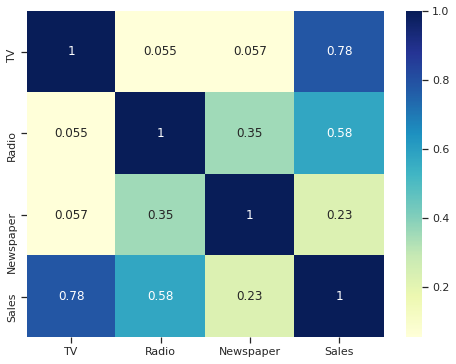

In [230]:
# Plot correlations on a heatmap.
plt.figure(figsize=(8,6))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [0]:
# Split a dataset into X and y.
X = advertising[['TV','Radio','Newspaper']]
y = advertising['Sales']

In [0]:
# Split the dataset into the training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [233]:
%%time
# LinearRegression
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

CPU times: user 2.06 ms, sys: 0 ns, total: 2.06 ms
Wall time: 2.11 ms


In [234]:
# Print the intercept.
print(lr.intercept_)

2.880255286331323


In [235]:
# Print the coefficient.
coeff_df = pd.DataFrame(lr.coef_, X_test.columns, columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.043915
Radio,0.200280
Newspaper,0.001844


In [0]:
# Make predictions using the model.
y_pred = lr.predict(X_test)

In [0]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

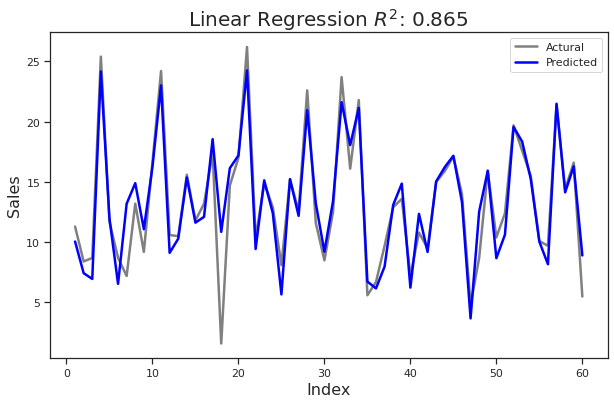

In [238]:
# Actual vs Predicted.
# Compute RMSE and R^2.
c = [i for i in range(1,61,1)]
fig = plt.figure(figsize=(10,6))
plt.plot(c, y_test, color="gray", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred, color="blue",  linewidth=2.5, linestyle="-")
plt.title("Linear Regression $R^2$: %.3f" % (r_squared), fontsize=20)
plt.xlabel('Index', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend(['Actural', 'Predicted'], loc='upper right')

Text(0, 0.5, 'ytest-ypred')

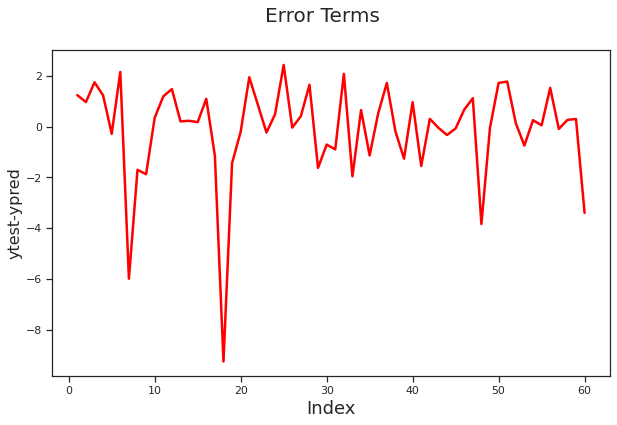

In [239]:
# Plot Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure(figsize=(10,6))
plt.plot(c, y_test-y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('ytest-ypred', fontsize=16)

In [240]:
print("MSE on test data : %f" % mse)
print("r^2 on test data : %f" % r_squared)

MSE on test data : 3.691395
r^2 on test data : 0.864902


In [241]:
# Use the STATSMODELS.
X_train_sm = sm.add_constant(X_train)
# Fit the model.
lr_1 = sm.OLS(y_train, X_train_sm).fit()

# Print the coefficients.
lr_1.params

const        2.880255
TV           0.043915
Radio        0.200280
Newspaper    0.001844
dtype: float64

In [242]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     439.9
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           8.76e-70
Time:                        19:30:13   Log-Likelihood:                -262.41
No. Observations:                 140   AIC:                             532.8
Df Residuals:                     136   BIC:                             544.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8803      0.360      7.994      0.0

In [0]:
# Split a dataset into X.
X_train_new = X_train[['TV','Radio']]
X_test_new = X_test[['TV','Radio']]

In [244]:
# Fit the model.
lr.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Make predictions using the model.
y_pred_new = lr.predict(X_test_new)

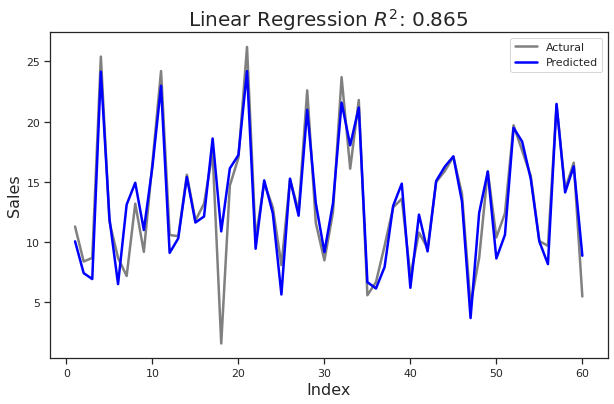

In [246]:
# Actual vs Predicted.
# Compute RMSE and R^2.
c = [i for i in range(1,61,1)]
fig = plt.figure(figsize=(10,6))
plt.plot(c, y_test, color="gray", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred_new, color="blue",  linewidth=2.5, linestyle="-")
plt.title("Linear Regression $R^2$: %.3f" % (r_squared), fontsize=20)
plt.xlabel('Index', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend(['Actural', 'Predicted'], loc='upper right')

Text(0, 0.5, 'ytest-ypred_new')

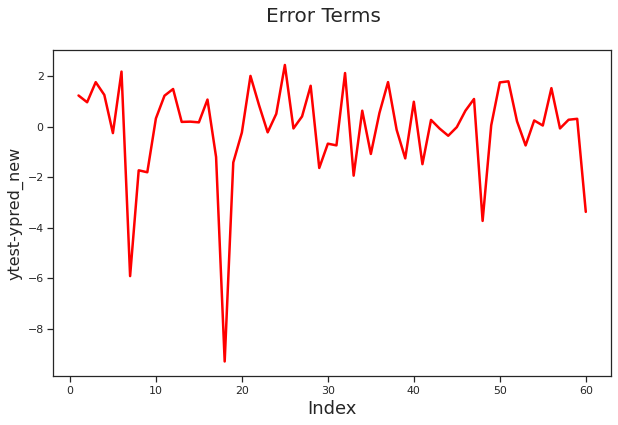

In [247]:
# Plot Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure(figsize=(10,6))
plt.plot(c, y_test-y_pred_new, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('ytest-ypred_new', fontsize=16)

In [248]:
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)
print("MSE on test data : %f" % mse)
print("r^2 on test data : %f" % r_squared)

MSE on test data : 3.670810
r^2 on test data : 0.865655


In [249]:
# Use the STATSMODELS.
X_train_sm_2 = sm.add_constant(X_train_new)
# Fit the model.
lr_2 = sm.OLS(y_train, X_train_sm_2).fit()

# Print the coefficients.
lr_2.params

const    2.909896
TV       0.043967
Radio    0.200995
dtype: float64

In [250]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     664.3
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           3.11e-71
Time:                        19:30:13   Log-Likelihood:                -262.45
No. Observations:                 140   AIC:                             530.9
Df Residuals:                     137   BIC:                             539.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9099      0.342      8.516      0.0

### **Recursive Feature Elimination (RFE)**

In [251]:

# Run the recursive feature elimination (RFE) with the output number of the features equal to 9.
lr = LinearRegression()
rfe = RFE(lr, 2)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]


In [252]:
col = X_train.columns[rfe.support_]
col

Index(['TV', 'Radio'], dtype='object')

In [0]:
# Creat X_train dataframe with RFE-selected features.
X_train_rfe = X_train[col]

In [254]:
X_train_rfe.head()

,TV,Radio
131,265.2,2.9
96,197.6,3.5
181,218.5,5.4
19,147.3,23.9
153,171.3,39.7


In [0]:
# Add a constant column.
X_train_rfe = sm.add_constant(X_train_rfe)

In [256]:
X_train_rfe.head()

,const,TV,Radio
131,1.0,265.2,2.9
96,1.0,197.6,3.5
181,1.0,218.5,5.4
19,1.0,147.3,23.9
153,1.0,171.3,39.7


In [0]:
# Run the Ordinary Least Squares (OLS) linear model.
# See https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html.
lr = sm.OLS(y_train, X_train_rfe).fit()

In [258]:
# Print the summary of the OLS linear model.
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     664.3
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           3.11e-71
Time:                        19:30:13   Log-Likelihood:                -262.45
No. Observations:                 140   AIC:                             530.9
Df Residuals:                     137   BIC:                             539.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9099      0.342      8.516      0.0

In [0]:
# Creat X_test dataframe with RFE-selected features.
X_test_rfe = X_test[col]

# Add a constant column.
X_test_rfe = sm.add_constant(X_test_rfe)

# Make predictions.
y_pred = lr.predict(X_test_rfe)

In [260]:
# Calculate R^2 score.
r_squared = r2_score(y_test, y_pred)
print("R^2 Score: %f" % r_squared)

R^2 Score: 0.865655


In [261]:
# Calculate Root Mean Square Error.
rmse_score = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', rmse_score)

RMSE: 1.9159357179956444


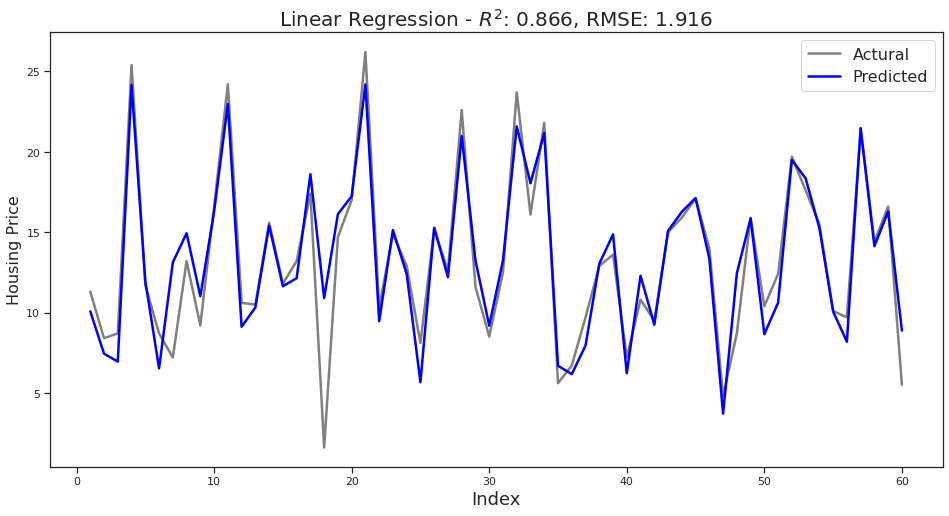

In [262]:
# Plot actual and predicted housing prices.
c = [i for i in range(1,61,1)] # generating index 
fig = plt.figure(figsize=(16,8))
plt.plot(c, y_test, color="gray", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred, color="blue",  linewidth=2.5, linestyle="-")
plt.title("Linear Regression - $R^2$: %.3f, RMSE: %.3f" % (r_squared, rmse_score), fontsize=20)
#plt.title("Linear Regression $R^2$: %.3f" % (r2_score), fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Housing Price', fontsize=16)
plt.legend(['Actural', 'Predicted'], loc='upper right', fontsize=16)

Text(0, 0.5, 'ytest-ypred')

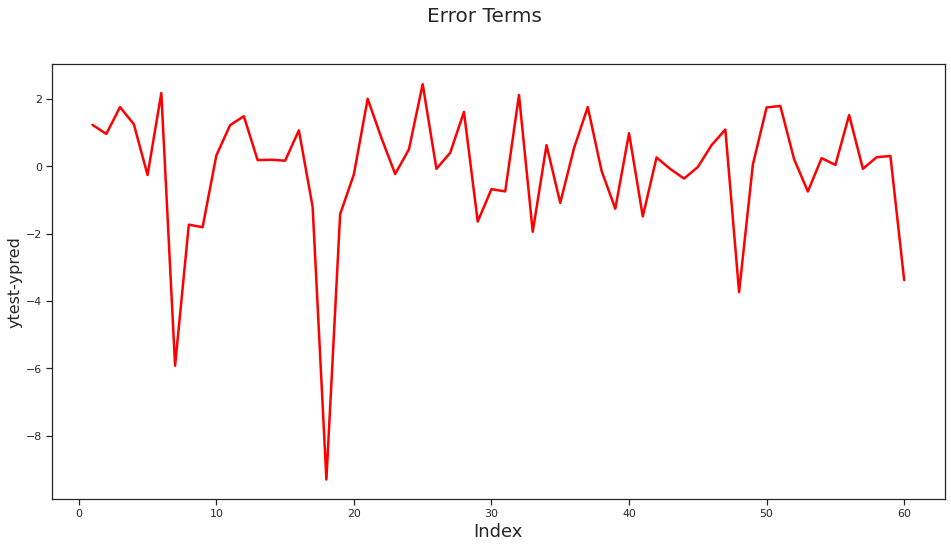

In [263]:
# Plot Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure(figsize=(16,8))
plt.plot(c, y_test-y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('ytest-ypred', fontsize=16)

In [0]:
result_reg = pd.concat([y_test, y_pred], axis=1)

In [265]:
result_reg.head()

,Sales,0
18,11.3,10.072781
170,8.4,7.439767
107,8.7,6.944767
98,25.4,24.149095
177,11.7,11.960760


In [0]:
result_reg.columns  = ["Actual", "Predicted"]

In [267]:
result_reg.head()

,Actual,Predicted
18,11.3,10.072781
170,8.4,7.439767
107,8.7,6.944767
98,25.4,24.149095
177,11.7,11.960760


In [268]:
type(result_reg)

pandas.core.frame.DataFrame

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 576x576 with 0 Axes>

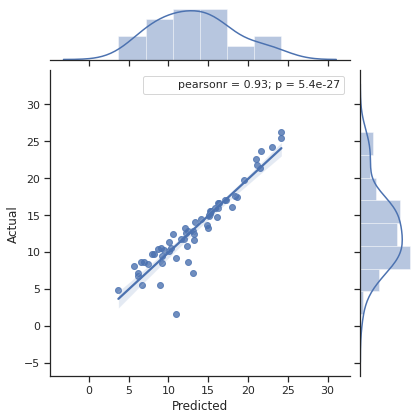

In [269]:
# Scatter Plot y_test and y_pred.
fig = plt.figure(figsize=(8,8))
g = sns.jointplot(result_reg['Predicted'], result_reg['Actual'], kind="reg")
g.annotate(stats.pearsonr)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 576x576 with 0 Axes>

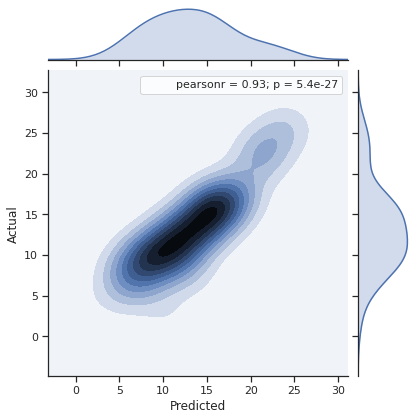

In [270]:
# Kernel density estimation (KDE) Plot y_test and y_pred.
fig = plt.figure(figsize=(8,8))
g = sns.jointplot("Predicted", "Actual", data=result_reg, kind='kde')
g.annotate(stats.pearsonr)